In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\anush\\OneDrive\\Desktop\\Python Case Study\\Case Study 2 - Credit Card Case Study')

In [3]:
#card_data_df = pd.read_excel('Credit Card Data.xlsx')
cust_acq_df = pd.read_csv('Customer Acqusition.csv')
repayment_df = pd.read_csv('Repayment.csv')
spend_df = pd.read_csv('spend.csv')

In [4]:
#card_data_df.head(2)

In [5]:
cust_acq_df.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [6]:
repayment_df.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [7]:
spend_df.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [8]:
#card_data_df.columns

In [9]:
cust_acq_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [10]:
repayment_df.columns

Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4'], dtype='object')

In [11]:
spend_df.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [12]:
# Merging df

In [13]:
repayment_cust_df = pd.merge(left=repayment_df,right=cust_acq_df,how='inner',on='Customer')

In [14]:
repayment_cust_df.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [15]:
repayment_cust_df.drop(['SL No:','No','Unnamed: 4'],axis=1,inplace=True)

In [16]:
repayment_cust_df.head(1)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [17]:
spend_cust_df = pd.merge(left=spend_df,right=cust_acq_df,how='inner',on='Customer')

In [18]:
spend_cust_df.head(1)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [19]:
spend_cust_df.drop(['Sl No:','No'],axis=1,inplace=True)

In [20]:
spend_cust_df.head(1)

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.8,76,BANGALORE,Gold,500000.0,C1,Self Employed


#### Exploratory Data Analysis (EDA)

In [21]:
print('The repayment df has',repayment_cust_df.shape[0],'rows and',repayment_cust_df.shape[1],'columns')

The repayment df has 1500 rows and 9 columns


In [22]:
print('The spend df has',spend_cust_df.shape[0],'rows and',spend_cust_df.shape[1],'columns')

The spend df has 1500 rows and 10 columns


### DataFrame Info

In [23]:
repayment_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
 3   Age       1500 non-null   int64  
 4   City      1500 non-null   object 
 5   Product   1500 non-null   object 
 6   Limit     1500 non-null   float64
 7   Company   1500 non-null   object 
 8   Segment   1500 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 105.6+ KB


#### Observations
Month which has date values stored is of wrong datatype

In [24]:
spend_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
 4   Age       1500 non-null   int64  
 5   City      1500 non-null   object 
 6   Product   1500 non-null   object 
 7   Limit     1500 non-null   float64
 8   Company   1500 non-null   object 
 9   Segment   1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB


#### Observations
Month which has date values stored is of wrong datatype

### Changing Datatype

In [25]:
repayment_cust_df.Month = pd.to_datetime(repayment_cust_df.Month,format = '%d-%b-%y')

In [26]:
spend_cust_df.Month = pd.to_datetime(spend_cust_df.Month,format = '%d-%b-%y')

### Checking datatypes again

In [27]:
repayment_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
 3   Age       1500 non-null   int64         
 4   City      1500 non-null   object        
 5   Product   1500 non-null   object        
 6   Limit     1500 non-null   float64       
 7   Company   1500 non-null   object        
 8   Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 105.6+ KB


In [28]:
spend_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
 4   Age       1500 non-null   int64         
 5   City      1500 non-null   object        
 6   Product   1500 non-null   object        
 7   Limit     1500 non-null   float64       
 8   Company   1500 non-null   object        
 9   Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 117.3+ KB


#### Datatypes are corrected now

### Five point summary

In [29]:
#Five point summary for numerical columns

In [30]:
repayment_cust_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,1500,2005-05-24 01:18:43.199999872,2004-01-03 00:00:00,2004-05-05 00:00:00,2005-05-29 00:00:00,2006-03-28 00:00:00,2006-12-03 00:00:00,NaN
Amount,1500.0,247890.05442,55.86,118604.905,248008.185,367236.89,499930.66,145290.382733
Age,1500.0,44.268667,12.0,28.0,42.0,57.0,79.0,17.51227
Limit,1500.0,297993.956667,10000.0,100000.0,500000.0,500000.0,500000.0,216239.376333


In [31]:
#Five point summary for categorical columns

In [32]:
repayment_cust_df.describe(include='object').T

,count,unique,top,freq
Customer,1500,100,A61,38
City,1500,8,BANGALORE,299
Product,1500,3,Gold,610
Company,1500,41,C22,103
Segment,1500,5,Normal Salary,441


In [33]:
#Five point summary for numerical columns

In [34]:
spend_cust_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,1500,2005-05-16 21:17:45.600000,2004-01-03 00:00:00,2004-04-25 00:00:00,2005-05-29 00:00:00,2006-03-26 00:00:00,2006-12-03 00:00:00,NaN
Amount,1500.0,243096.04946,720.3,122606.4875,239210.36,361617.6325,499793.49,141349.547367
Age,1500.0,44.268667,12.0,28.0,42.0,57.0,79.0,17.51227
Limit,1500.0,297993.956667,10000.0,100000.0,500000.0,500000.0,500000.0,216239.376333


#### Five point summary for categorical columns

In [36]:
spend_cust_df.describe(include='object').T

,count,unique,top,freq
Customer,1500,100,A61,38
Type,1500,15,PETRO,200
City,1500,8,BANGALORE,299
Product,1500,3,Gold,610
Company,1500,41,C22,103
Segment,1500,5,Normal Salary,441


### Checking missing values

In [41]:
repayment_cust_df.isna().sum()

Customer    0
Month       0
Amount      0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

#### There are no missing columns in repayment_cust_df

In [42]:
spend_cust_df.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

#### There are no missing values in spend_cust_df as well

## Questions

####  1. In the above dataset,
##### a. In case age is less than 18, replace it with mean of age values.
##### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [43]:
#1 a. In case age is less than 18, replace it with mean of age values.

In [44]:
spend_cust_df['Age']= np.where(spend_cust_df.Age < 18,spend_cust_df.Age.mean().round(2),spend_cust_df.Age)
repayment_cust_df['Age']= np.where(repayment_cust_df.Age < 18,repayment_cust_df.Age.mean().round(2),spend_cust_df.Age)

In [45]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)
spend_cust_df['Amount'] = np.where(spend_cust_df.Amount > spend_cust_df.Limit,0.5 * spend_cust_df.Limit,spend_cust_df.Amount)

In [46]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
repayment_cust_df['Amount']= np.where(repayment_cust_df.Amount > repayment_cust_df.Limit,repayment_cust_df.Limit,repayment_cust_df.Amount)

#### 2. From the above dataset create the following summaries:
##### a. How many distinct customers exist?
##### b. How many distinct categories exist?
##### c. What is the average monthly spend by customers?
##### d. What is the average monthly repayment by customers?

In [47]:
# a. How many distinct customers exist?
Num_of_unique_cust = spend_cust_df.Customer.nunique()
print('There are',Num_of_unique_cust,'unique customers.')

There are 100 unique customers.


In [48]:
# b. How many distinct categories exist?
Num_of_Dis_cat = spend_cust_df.Product.nunique()
print('Number of distinct product category are',Num_of_Dis_cat)

Number of distinct product category are 3


In [49]:
# c. What is the average monthly spend by customers?
spend_cust_df['Month_num'] = spend_cust_df.Month.dt.month
Avg_monthly_spend = spend_cust_df[['Month_num','Amount']].groupby(by='Month_num').mean().round(2)
Avg_monthly_spend.head(3)

,Amount
Month_num,
1,147770.18
2,151261.57
3,131840.76


In [50]:
# d. What is the average monthly repayment by customers?
repayment_cust_df['Month_num']= repayment_cust_df.Month.dt.month
Avg_monthly_repayment = repayment_cust_df[['Month_num','Amount']].groupby(by='Month_num').mean().round(2)
Avg_monthly_repayment.head(3)

,Amount
Month_num,
1,163445.53
2,158873.10
3,156430.85


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [51]:
Monthly_repayment= repayment_cust_df[['Month_num','Amount']].groupby(by='Month_num').sum()
Monthly_spend = spend_cust_df[['Month_num','Amount']].groupby(by='Month_num').sum()
Monthly_Profit = Monthly_repayment - Monthly_spend
Positive_profit = Monthly_Profit[Monthly_Profit['Amount'] > 0]
Bank_Profit = Positive_profit * 0.029
Bank_Profit

,Amount
Month_num,
1,16452.61263
2,6461.60252
3,110291.09103
4,141987.86106
5,512169.17980
7,32168.70472
8,15258.37349
10,12016.27673
11,5514.54865


In [52]:
# f. What are the top 5 product types?
top_5_product = spend_cust_df.Type.value_counts().head(5)
top_5_product

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

In [53]:
# g. Which city is having maximum spend?
spend_by_city = spend_cust_df[['City','Amount']].groupby(by='City').sum().sort_values(by='Amount',ascending=False)
print('The city with max spend is',spend_by_city.index[0],'with a spend of',spend_by_city.iloc[0]['Amount'])

The city with max spend is COCHIN with a spend of 45963513.5


In [54]:
# h. Which age group is spending more money?
spend_cust_df['AgeGroup'] = pd.cut(spend_cust_df.Age,bins=[19,29,39,49,59,69,79],labels=['19-29','29-39','39-49','49-59','59-69','69-79'])
spend_by_age_sorted = spend_cust_df[['AgeGroup','Amount']].groupby(by='AgeGroup',observed=True).sum().sort_values(by='Amount',ascending=False)
print('The age group spending maximum money is',spend_by_age_sorted.index[0],'with a total spend of',spend_by_age_sorted.iloc[0]['Amount'])

The age group spending maximum money is 19-29 with a total spend of 52619884.21


In [55]:
# i. Who are the top 10 customers in terms of repayment?
repayment_cust_df[['Customer','Amount']].groupby(by='Customer').sum().sort_values(by='Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

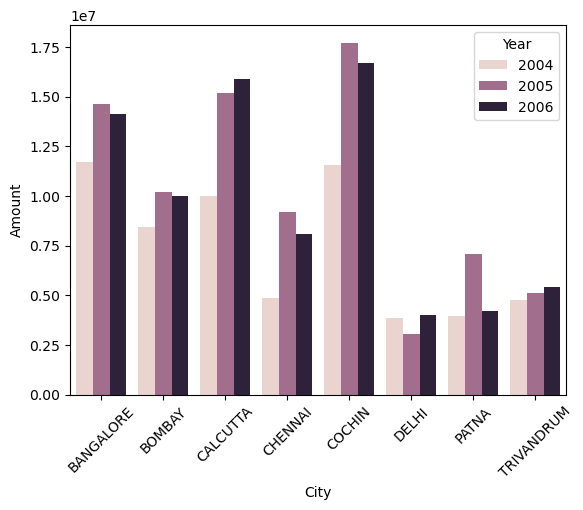

In [57]:
spend_cust_df['Year'] = spend_cust_df.Month.dt.year
YearlySpend_by_city = spend_cust_df[['Year','City','Amount']].groupby(by=['Year','City']).sum()
sns.barplot(data=YearlySpend_by_city,x='City',y='Amount',hue='Year')
plt.xticks(rotation=45)
plt.show()

#### 4. Create graphs for
##### a. Monthly comparison of total spends, city wise
##### b. Comparison of yearly spend on air tickets
##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

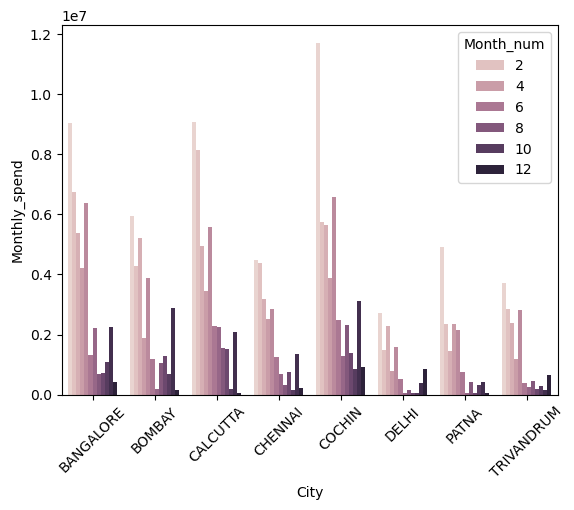

In [75]:
# a.Monthly comparison of total spends, city wise
monthly_spend_df=spend_cust_df[['City','Month_num','Amount']].groupby(by=['Month_num','City']).sum().rename(columns={'Amount':'Monthly_spend'}).reset_index()
sns.barplot(data=monthly_spend_df,x='City',y='Monthly_spend',hue='Month_num')
plt.xticks(rotation=45)
plt.show()

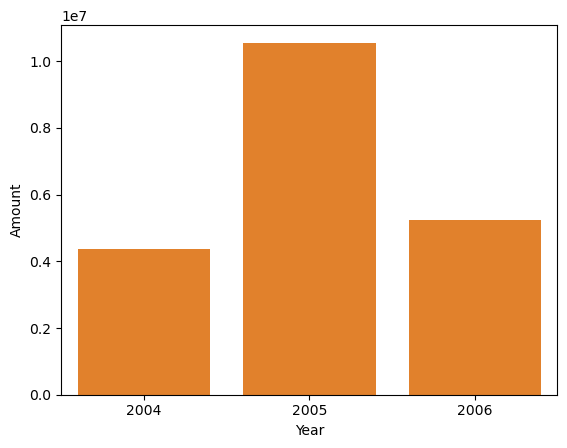

In [86]:
# b.Comparison of yearly spend on air tickets
filtered_df = spend_cust_df[spend_cust_df.Type == 'AIR TICKET']
ticketspend=filtered_df[['Year','Amount']].groupby(by='Year').sum()
sns.barplot(data=ticketspend,x='Year',y='Amount')
plt.show()

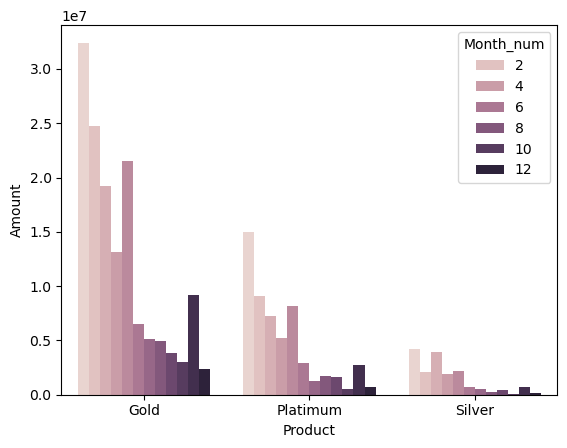

In [104]:
# c. Comparison of monthly spend for each product(look for any seasonality that exists in terms of spend
prod_spend=spend_cust_df[['Month_num','Product','Amount']].groupby(by=['Month_num','Product']).sum()
sns.barplot(data=prod_spend,x='Product',y='Amount',hue='Month_num')
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [105]:
def top10_cust(df,time_period,product):
    repayment_cust_df['Year']= repayment_cust_df.Month.dt.year
    repayment_cust_df['Month_num'] = df['Month'].dt.month

    if time_period.lower() == 'yearly':
        time_col = 'Year'
    elif time_period.lower() == 'monthly':
        time_col = 'Month_num'
    else:
        print('Invalid Input. Enter either YEARLY or MONTHLY.')

    if product not in ('Gold','Silver','Platinum'):
        print('Incorrect input!. Please enter either GOLD,SILVER or PLATINUM.')

    filtered_df = repayment_cust_df[repayment_cust_df.Product == product]

    grouped_df = filtered_df[[time_col,'Customer','Amount']].groupby(by=['Customer',time_col]).sum()

    top10 = grouped_df.sort_values(by='Amount',ascending=False).head(10)

    return top10

In [113]:
top10_cust(repayment_cust_df,'monthly','Gold')

,,Amount
Customer,Month_num,
A61,4,3412860.60
A42,5,3305341.39
A30,5,3086549.14
A29,5,2612139.63
A42,1,2516249.24
A60,1,2465584.81
A44,1,2415712.91
A1,1,2407806.29
A60,4,2397565.91
